In [822]:
# Finding the relationship between conversation data and stress levels 

In [823]:
'''
Trying to identify features that contribute to the daily stress levels 
of a university student.

features like:


'''

'\nTrying to identify features that contribute to the daily stress levels \nof a university student.\n\nfeatures like:\n\n\n'

In [824]:
import matplotlib.pyplot as plt
import json
import datetime
import pandas as pd
import numpy as np
import collections as clt
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns


In [825]:
# Reading data from JSON File and csv
# Stress JSON , Conversation.csv ,Sleep.json,Social.json,Exercise.json


path1 = r"R:\3-2\datasets\Student_life_dataset\dataset\EMA\response\Stress\Stress_u00.json"
path2 = r"R:\3-2\datasets\Student_life_dataset\dataset\sensing\conversation\conversation_u00.csv"
path3 = r"R:\3-2\datasets\Student_life_dataset\dataset\EMA\response\Sleep\Sleep_u00.json"
path4 = r"R:\3-2\datasets\Student_life_dataset\dataset\EMA\response\Social\Social_u00.json"
path5 = r"R:\3-2\datasets\Student_life_dataset\dataset\EMA\response\Exercise\Exercise_u00.json"




In [826]:
'''
Getting the no of calls made on day and storing in no_calls dictionay 
with date as the key
'''
data = pd.read_csv(path2)
call_time = np.array(data.iloc[:,0:2].values)

call_date = []


calls = np.array((call_time[:,1]+call_time[:,0])/2)
calls = np.resize(calls,(calls.size,1))

for i in range(calls.size):
    call_date.append(datetime.date.fromtimestamp(int(calls[i])).strftime('%d-%m-%Y'))
    
# for i in range(len(call_date)):
#     print(call_date[i],"\n")

no_calls = {}
count = 0

for i in range(len(call_date)):
    count = count+1
    no_calls[call_date[i]] = count
    if(i<len(call_date)-1):
        if(call_date[i]!=call_date[i+1]):
            count = 0;

total = sum(no_calls.values())

print(no_calls)


{'27-03-2013': 10, '28-03-2013': 24, '29-03-2013': 32, '30-03-2013': 29, '31-03-2013': 23, '01-04-2013': 25, '02-04-2013': 34, '03-04-2013': 38, '04-04-2013': 23, '05-04-2013': 30, '06-04-2013': 32, '07-04-2013': 42, '08-04-2013': 33, '09-04-2013': 20, '10-04-2013': 34, '11-04-2013': 32, '12-04-2013': 33, '13-04-2013': 51, '14-04-2013': 45, '15-04-2013': 29, '16-04-2013': 44, '17-04-2013': 20, '18-04-2013': 13, '19-04-2013': 34, '20-04-2013': 20, '21-04-2013': 46, '22-04-2013': 27, '23-04-2013': 27, '24-04-2013': 36, '25-04-2013': 31, '26-04-2013': 32, '27-04-2013': 45, '28-04-2013': 18, '29-04-2013': 41, '30-04-2013': 41, '01-05-2013': 49, '02-05-2013': 29, '03-05-2013': 24, '04-05-2013': 65, '05-05-2013': 49, '06-05-2013': 50, '07-05-2013': 49, '08-05-2013': 44, '09-05-2013': 24, '10-05-2013': 31, '11-05-2013': 41, '12-05-2013': 30, '13-05-2013': 25, '14-05-2013': 21, '15-05-2013': 53, '16-05-2013': 25, '17-05-2013': 24, '18-05-2013': 13, '19-05-2013': 11, '20-05-2013': 27, '21-05-20

In [827]:
'''
  stress levels:
     1:Feeling great(5), 2:Feeling Good(4), 3:Little Stressed(1) ,4:Definitely stressed(2) ,5:Stressed out(3)
    5->1
    4->2
    1->3
    2->4
    3->5

    From the data the maximum daily stress level is recorded
    in dictionary daily_stress with date as key
'''
stress_data = []
file1 = open(path1)
stress_json = json.load(file1)

switch = {5:1, 4:2, 1:3, 2:4, 3:5}

for item in stress_json:
    
    try:
        buf = item["level"]    
    except KeyError:
        continue
        
    form = {"level": None, "time": None}
    form["level"] = switch[int(item["level"])]
    form["time"] = item["resp_time"]
    stress_data.append(form)

daily_stress = {} 

for i in range(len(stress_data)):
    j = datetime.date.fromtimestamp(int(stress_data[i]["time"])).strftime('%d-%m-%Y')
    try:
        buf = daily_stress[j]
    except KeyError:
        daily_stress[j]=-1

    daily_stress[j] = max(stress_data[i]["level"],daily_stress[j])

print(daily_stress)

{'26-03-2013': 4, '27-03-2013': 3, '29-03-2013': 5, '28-03-2013': 3, '30-03-2013': 3, '31-03-2013': 2, '01-04-2013': 1, '03-04-2013': 4, '04-04-2013': 3, '05-04-2013': 4, '06-04-2013': 3, '07-04-2013': 1, '08-04-2013': 5, '15-04-2013': 5, '16-04-2013': 5, '09-04-2013': 5, '10-04-2013': 3, '13-04-2013': 4, '18-04-2013': 2, '17-04-2013': 5, '25-04-2013': 3, '23-04-2013': 3, '26-04-2013': 3, '29-04-2013': 4, '30-04-2013': 5, '15-05-2013': 2, '08-05-2013': 3, '16-05-2013': 3, '09-05-2013': 2, '07-05-2013': 3, '17-05-2013': 2, '18-05-2013': 2, '20-05-2013': 3, '21-05-2013': 4, '22-05-2013': 3, '23-05-2013': 3, '24-05-2013': 3, '25-05-2013': 5, '03-06-2013': 3, '07-08-2013': 3, '08-08-2013': 5, '10-08-2013': 3, '16-08-2013': 4}


In [828]:
'''
Sleep data:
Data definition:

key1: hour -How many hours did you sleep last night? 
options:
    "[1]<3, [2]3.5, [3]4, [4]4.5, [5]5, [6]5.5, [7]6, [8]6.5, [9]7, [10]7.5, [11]8, [12]8.5, [13]9, [14]9.5,        [15]10, [16]10.5, [17]11, [18]11.5, [19]12"

key2: rate - How would rate your overall sleep last night?
options:
    [1]Very good, [2]Fairly good, [3]Fairly bad, [4]Very bad
'''

sleep_hours = {}
sleep_quality = {}
file3 = open(path3)
sleep_json = json.load(file3)

duration = {"1":3,"2":3.5,"3":4,"4":4.5,"5":5,"6":5.5,"7":6,"8":6.5,"9":7,"10":7.5,"11":8,"12":8.5,"13":9,"14":9.5,"15":10,"16":10.5,"17":11,"18":11.5,"19":12}
for item in sleep_json:
    try:
        buf = item["hour"]
    except KeyError:
        continue

    date  = datetime.date.fromtimestamp(int(item["resp_time"])).strftime('%d-%m-%Y')
    sleep_hours[date] = duration[item["hour"]]
    sleep_quality[date] = int(item["rate"])
    

print(len(sleep_hours))





40


In [829]:
'''
Social Data:
Data definition:
key1: "number" - "How many people did you have contact with yesterday, including anyone you said hello to,                       chatted, talked or discussed matters with, whether you did it face-to-face, by telephone, by                   mail or on the internet, and whether you personally knew the person or not? Please select                      one of the following categories that best matches your estimate:"

                    [1]0-4 persons, [2]5-9 persons, [3]10-19 persons, [4]20-49 persons, [5]50-99 persons, 
                    [6]over100 persons
'''
social_data = {}
file4 = open(path4)
social_json = json.load(file4)

for item in social_json:
    try:
        buf = item["number"]
    except KeyError:
        continue;

    
    date = datetime.date.fromtimestamp(int(item["resp_time"])).strftime('%d-%m-%Y')
    social_data[date] = int(item["number"])
    

print(social_data)

{'26-03-2013': 5, '27-03-2013': 1, '04-04-2013': 3, '28-03-2013': 3, '29-03-2013': 4, '30-03-2013': 4, '31-03-2013': 2, '01-04-2013': 2, '03-04-2013': 2, '05-04-2013': 4, '06-04-2013': 5, '08-04-2013': 4, '10-04-2013': 5, '11-04-2013': 4, '12-04-2013': 3, '13-04-2013': 3, '18-04-2013': 4, '19-04-2013': 3, '21-04-2013': 2, '23-04-2013': 3, '07-05-2013': 4, '10-05-2013': 4, '06-05-2013': 3, '11-05-2013': 4, '13-05-2013': 3, '14-05-2013': 4, '12-05-2013': 2, '21-05-2013': 1, '28-05-2013': 2, '25-05-2013': 2, '27-05-2013': 2, '29-05-2013': 2, '30-05-2013': 2, '31-05-2013': 3, '02-06-2013': 2, '03-06-2013': 1, '04-06-2013': 1, '06-06-2013': 2}


In [830]:
'''
Exercise Data:
Data definition:

key1:"have" - "Did you do vigorous exercise today (don't include walking) such as run, swim, cycle, play a                    sport"
                (Yes) 1 2 (No)
key2:"exercise" -"If you exercised how long did you exercise for?"
                [1]None, [2]<30 mins, [3]30-60 mins, [4]60-90 mins, [5]>90mins

key3:"walk"    - "How long did you walk for today?"
                [1]None, [2]<30 mins, [3]30-60 mins, [4]60-90 mins, [5]>90mins

'''
exercise_data = {}
file5 = open(path5)
exercise_json = json.load(file5)

time = {"1":0,"2":15,"3":30,"4":60,"5":90}

for item in exercise_json:
    try:
        buf = item["have"]
    except KeyError:
        continue
    
    date = datetime.date.fromtimestamp(int(item["resp_time"])).strftime('%d-%m-%Y')
    exercise_data[date]= time[item["exercise"]]+time[item["walk"]]
    

print(exercise_data)



{'03-04-2013': 75, '01-04-2013': 0, '02-04-2013': 0, '04-04-2013': 30, '06-04-2013': 90, '05-04-2013': 90, '08-04-2013': 60, '07-04-2013': 60, '10-04-2013': 30, '18-04-2013': 15, '13-04-2013': 30, '17-04-2013': 0, '19-04-2013': 30, '22-04-2013': 45, '24-04-2013': 15, '29-04-2013': 30, '06-05-2013': 90, '08-05-2013': 15, '16-05-2013': 0, '17-05-2013': 60, '09-05-2013': 0, '19-05-2013': 0, '20-05-2013': 0, '01-06-2013': 0, '26-05-2013': 60, '29-05-2013': 0, '30-05-2013': 30, '31-05-2013': 30, '02-06-2013': 0, '05-06-2013': 15, '06-06-2013': 30, '03-06-2013': 45, '07-08-2013': 0}


In [831]:
# combining all data from features
comb = []
for key in daily_stress:
    if key in exercise_data:
        if key in sleep_hours:
            if key in social_data:
                if key in no_calls:
                    if key in sleep_quality:
                        form = {"Date":None,"No of calls":None,"Sleep hours":None,"Sleep quality":None,"Social":None,"Exercise":None,"Stress Level":None}

                        
                        form["Date"] = key
                        form["No of calls"] = no_calls[key]
                        form["Sleep hours"] = sleep_hours[key]
                        form["Sleep quality"] = sleep_quality[key]
                        form["Social"] = social_data[key]
                        form["Exercise"] = exercise_data[key]
                        form["Stress Level"] = daily_stress[key]
                        comb.append(form)

print(len(comb))




7


In [832]:
# some random plots



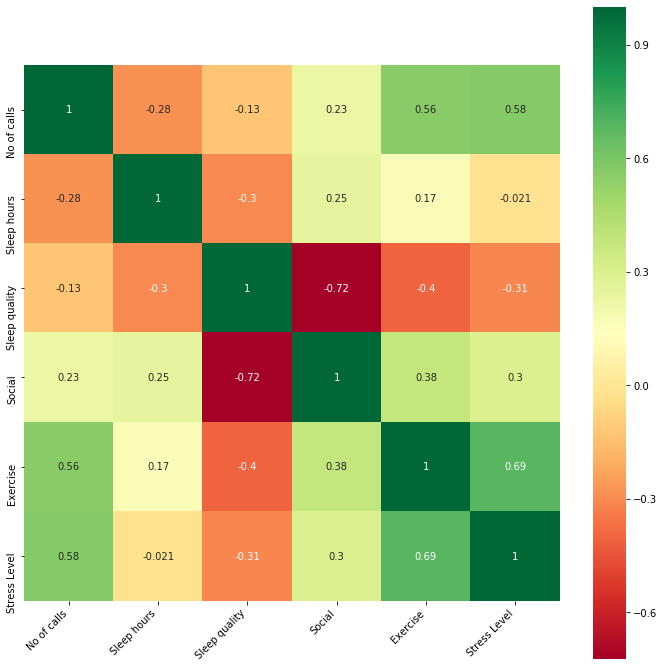

In [833]:
#  Calculating the co-variance matrix heat map of stress in students 

df=pd.DataFrame(comb)
# df.to_csv("Stress.csv")
x = df.iloc[:,2:3]
y = df.iloc[:,-1]
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",square=True)
g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!



25

Pearson’s correlation coefficient:  -0.5063160982880899


<Figure size 360x360 with 0 Axes>

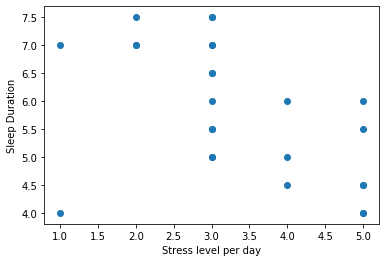

<Figure size 360x360 with 0 Axes>

In [834]:
'''
combining data based on the common time stamp:

'''
# finding the common data between 
combined = []
for key in sleep_hours:
    if key in daily_stress:
        sample = {"date":None,"duration":None,"Stress":None}
        sample["date"] = key
        sample["duration"] = sleep_hours[key]
        sample["Stress"] = daily_stress[key]
        combined.append(sample)

 

sleep_per_day = [ ]
stress_per_day = [ ]

for i in range(len(combined)):
    sleep_per_day.append(combined[i]["duration"])
    stress_per_day.append(combined[i]["Stress"])

print(len(combined))

# day_count = np.arange(1,len(exercise_per_day)+1,1)

# fig, ax1 = plt.subplots()
# color = 'tab:blue'
# ax1.set_xlabel("Days")
# ax1.set_ylabel("No of calls made",color = color)
# ax1.plot(day_count,calls_per_day,color = color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.set_ylabel("Stress Level",color = color)

# ax2.plot(day_count,stress_per_day,color = color)
# ax2.tick_params(axis='y', labelcolor=color)
# fig.tight_layout()
# plt.show()
from scipy.stats import pearsonr
p_corr,_ = pearsonr(sleep_per_day,stress_per_day)
print('\nPearson’s correlation coefficient: ',p_corr)
plt.xlabel("Stress level per day")
plt.ylabel("Sleep Duration")
plt.scatter(stress_per_day,sleep_per_day)
plt.figure(figsize=(5,5))
    


In [835]:
n = len(stress_data)

t0 = stress_data[0]["time"]

max_stress = [0]*400



for i in range(n):

    stress_data[i]["time"] = stress_data[i]["time"] - t0
    stress_data[i]["time"] = round(stress_data[i]["time"]/86400)
    day = stress_data[i]["time"]
    level = stress_data[i]["level"]

    if(level>max_stress[day]):
        max_stress[day] = level;

    
# print(max_stress)

days =[]
stress =[]

for i in range(400):
    if(max_stress[i]):
        days.append(i)
        stress.append(max_stress[i])

# plt.scatter(days,stress);



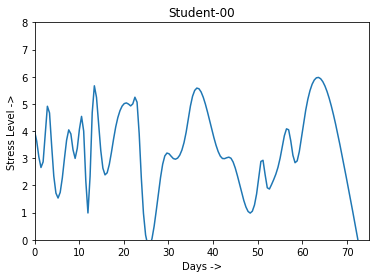

In [836]:
x = np.linspace(min(days),max(days),300)
spl =  make_interp_spline(days,stress,k=3)
y = spl(x)
axes = plt.axes()
axes.set_ylim([0,8])
axes.set_xlim([0,75])
plt.title("Student-00")

plt.xlabel("Days ->")
plt.ylabel("Stress Level ->")
plt.plot(x,y)